<a href="https://colab.research.google.com/github/priyeshroy10155/Deep-learning-projects/blob/main/Mnist_data_set_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

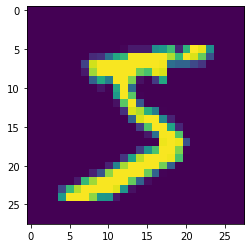

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example=to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [16]:
y_cat_train=to_categorical(y_train,10)

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [19]:
x_train=x_train/255

In [20]:
x_test=x_test/255

In [21]:
scaled_image=x_train[0]

In [22]:
scaled_image.max()

1.0

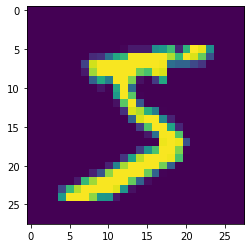

In [23]:
plt.imshow(scaled_image)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
#batch_size,width,hight,color_channels
x_train=x_train.reshape(60000,28,28,1)

In [26]:
x_test=x_test.reshape(10000,28,28,1)

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [29]:
#from ssl import PROTOCOL_SSLv2
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#output layer softmax  ...Multi class
model.add(Dense(10,activation='softmax'))
#keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [32]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1366 - accuracy: 0.9588 - val_loss: 0.0585 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0493 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0444 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0449 - val_accuracy: 0.9868


In [33]:
metrics=pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136644,0.958833,0.058489,0.9802
1,0.047313,0.984733,0.049302,0.9854
2,0.029396,0.990783,0.044411,0.9853
3,0.020080,0.993433,0.037478,0.9878
4,0.013293,0.995500,0.044910,0.9868


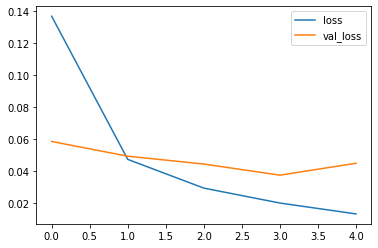

In [35]:
metrics[['loss','val_loss']].plot()

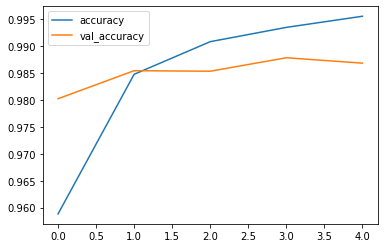

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04491027444601059, 0.9868000149726868]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
#predictions=model.predict_classes(x_test)

In [41]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 6ms/step


In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    2,    0,    0,    0,    0,    1,    2,    0],
       [   0, 1131,    1,    2,    1,    0,    0,    0,    0,    0],
       [   1,    0, 1017,    3,    1,    0,    0,    7,    3,    0],
       [   0,    0,    1, 1005,    0,    0,    0,    2,    2,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    0,    6],
       [   1,    0,    0,   22,    0,  867,    1,    0,    1,    0],
       [   6,    3,    0,    1,    2,    3,  938,    0,    5,    0],
       [   0,    2,    5,    0,    0,    0,    0, 1018,    1,    2],
       [   3,    1,    0,    2,    1,    2,    0,    4,  956,    5],
       [   1,    2,    0,    2,    9,    3,    0,    5,    0,  987]])

In [46]:
import seaborn as sns

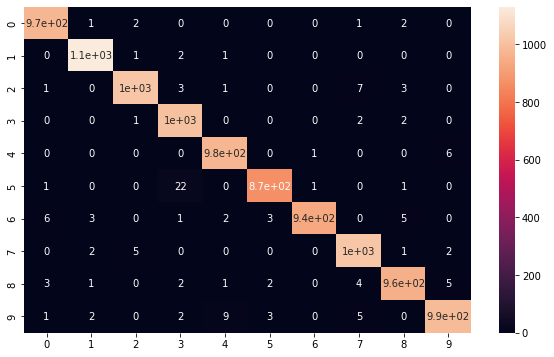

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)